## Loading spec (235, 1, 1)
Train data size neg 3986
Train data size pos 4605
Eval data size neg 969
Eval data size pos 1133
Train neg cardinality -1
Train pos cardinality -1
Validation neg cardinality 31
Validation pos cardinality 36
#### Training model: (235, 1, 1) #### 


Model: "BasicCoreModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            multiple                  896       
_________________________________________________________________
conv2d_9 (Conv2D)            multiple                  18496     
_________________________________________________________________
conv2d_10 (Conv2D)           multiple                  36928     
_________________________________________________________________
conv2d_11 (Conv2D)           multiple                  73856     
_________________________________________________________________
global_average_pooling2d_2 ( multiple   

INFO:tensorflow:Assets written to: ./bestAccModel/(235, 1, 1)/assets


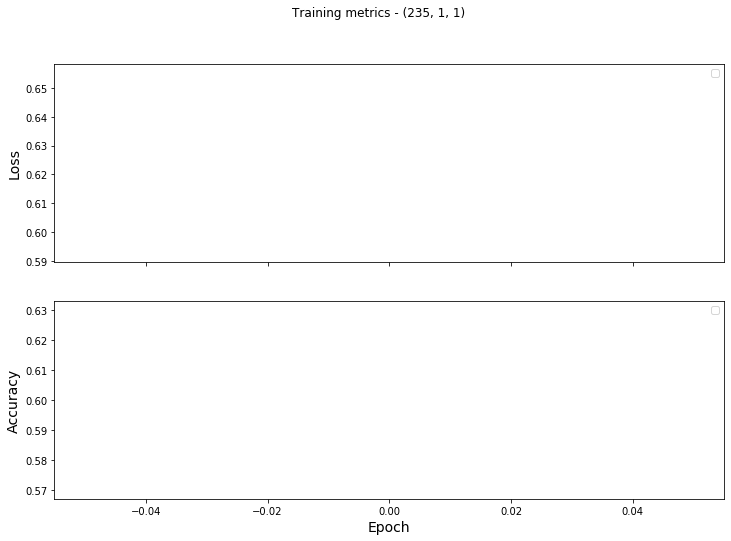

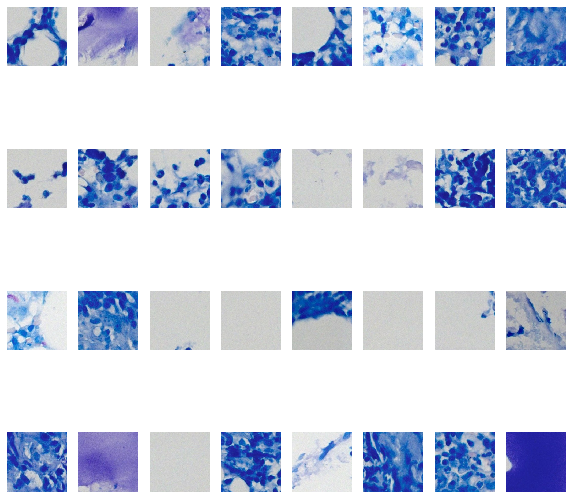

In [5]:
# TODO: evaluation corectness, showing only after each epoch, training vs logits
        

# The purpose of this script is to train the best possible detector for bounding box classification problem
# The solution using deep learning is split in two phases : (a) train the core detector  (b) region proposal
# We'll be using the Faster-RCNN architecture: https://arxiv.org/abs/1506.01497. pr Fast=RCNN, depending which one is giving better accuracy for our data
# This notebook is for the first part

# NOTES  and overall process TODO:
"""
- The best model would be to exhaustively search for bboxes of different sizes. 
  It would be a little slower at evaluation but keep a very good performance
- The model is likely to produce false positives in the end.
  Why ? Think that it the model has an accuracy of 95%. If you test 100 boxes in a negative case figure, 5 will be wrong and the 
 image could be marked as positive !. 
  Solutions:
    A. At the technical level
        - Improve the accuracy (check the list below).
        - Provide more scale-free solutions and test bboxes at scales that gives us the best results (note that all images are rescaled up to 224x224 so this could be improved a lot)
    B. At usability level:
        - Doctors could see the image with the model proposed as red bboxes. They can discard the false positives
    
    The most important things from my point of view: 
        1) Provide as less false positive as possible to avoid manual work
        2) Do not loose positive cases - but this works as expected even now because 95% means that from several boxes around the positive will be found whatever
"""


# TODO list for core detector:
"""
- # TODO: add more groups when we have data. E.g. (2,2), (1,4), (4,1), (4,2), (2,4), (4,4)
- use tf.functions after debugging ends to speedup things
- use KL divergence as metric to test the probability difference not only  the accuracy !
- fix the GpU vs CPU usage: seems like the CPU is the bottleneck because he processes a lot and doesn't feed optimally the GPU.
- try to get prelearned layers from image net
- change the LR dynamically adjustring when no improvements
- change the architecture with more dense layers in the middle
- check for gradients dying problem
- try with different activations
- PROB_THRESHOLD_POSITIVE, maybe we need 3 classes: UNSURE, SURE POSITIVE, SURE NEGATIVE
- needs to split more in train, test, eval not only train, eval
- check overfitting, batch normalization. layer norm, dropout layers
- DO Hyperparameter tuning using HParams
"""
%run coremodelcommons.py
%run utils
%run coremodeltf
%run coremodeldatasetutils
%run coremodelmain


coreModelMain = CoreModelMain()
coreModelMain.loadDatasets("") # "/Users/ciprian/Downloads/SplittedDatasets"
coreModelMain.plotSampleFromDataset(1, 1)
coreModelMain.plotSampleFromDataset(1, 2)
coreModelMain.plotSampleFromDataset(2, 1)

coreModelMain.trainDatasets()

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Inference demo on a given model

# Load the datasets
train_neg_ds, train_pos_ds, validation_neg_ds, validation_pos_ds, trainMaxSize, evalMaxSize = loadDatasets("/Users/ciprian/Downloads/SplittedDatasets", 35, 1, 1)


# Show them visually on screen, sample data rom them

#batch_images = tf.concat(values=[batch_pos[0], batch_neg[0]], axis =0)
#batch_labels = tf.concat(values=[batch_pos[1], batch_neg[1]], axis=0)




In [ ]:
sampleDatasetDemo(train_pos_ds, "POSITIVE SAMPLES TEST")


In [ ]:
sampleDatasetDemo(train_neg_ds, "NEGATIVE SAMPLES TEST")



In [ ]:
# Tensorboard evaluation
#import tensorflow as tf
#%reload_ext tensorboard
#%tensorboard --logdir tensorboard